# Pandas 学习
***
**[Pandas 官网](http://pandas.pydata.org/)**   
**[Pandas 下载链接](https://pypi.org/project/pandas/#files)**     
**[Pandas PDF参考文档](http://pandas.pydata.org/pandas-docs/stable/pandas.pdf)**   
**[Pandas 0.24.2 文档](http://pandas.pydata.org/pandas-docs/stable/)**   
***
Pandas 是一个 Python 支持包，基于 Numpy 构建，提供快速，灵活和富有表现力的数据结构。如果将 Numpy 类比于 Python 的列表形式，那么 Pandas 则倾向于字典形式，为数据提供了数值标签。  
想要使用 Pandas ，就需要先了解它的两个主要数据结构: **Series**（1维）和 **DataFrame**（2维）

In [36]:
import pandas as pd
import numpy as np

series = pd.Series([1, 2, "abc", np.nan])
print(series)
print('\n')

dates = pd.date_range('20190315', periods = 5)
print(dates)
print('\n')

# DataFrame 通过传递带有日期时间索引和标记列的NumPy数组来创建：
df = pd.DataFrame(np.random.randn(5,4), index = dates, columns = ['a','b','c','d'])
print(df)
print('\n')

# DataFrame 可以使用类似“key”:“value”的方式进行创建
# DataFrame({'column_1' : value
#            'column_2' : value
#            ......
#            'column_n' : value})
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["one","two","three","four"]),
                    'F' : 'foo'})
print(df2)
print('\n')

0      1
1      2
2    abc
3    NaN
dtype: object


DatetimeIndex(['2019-03-15', '2019-03-16', '2019-03-17', '2019-03-18',
               '2019-03-19'],
              dtype='datetime64[ns]', freq='D')


                   a         b         c         d
2019-03-15  1.266476 -0.767622  0.043831 -1.950904
2019-03-16  0.575488 -1.381921  0.235350  1.394558
2019-03-17  0.670283 -1.704085 -0.214981  2.457907
2019-03-18 -1.021964 -1.004377  0.922029 -2.343169
2019-03-19 -0.022523  0.080399 -1.782991 -0.109787


     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3    one  foo
1  1.0 2013-01-02  1.0  3    two  foo
2  1.0 2013-01-02  1.0  3  three  foo
3  1.0 2013-01-02  1.0  3   four  foo




# Pandas 查看数据
***
通过对象的属性或调用其他方法，可以查看数据的类型、行（或列）信息等。  

In [63]:
print(df2.head())  # 从顶行查看
print(df2.tail(2),'\n')  # 从底行查看

print(df2.describe(),'\n')  # 显示数据的快速统计摘要

print(df2.dtypes,'\n')  # 查看数据类型

print(df2.index)  # 查看行
print(df2.columns)  # 查看列
print(df2.values,'\n')  # 查看值

print(df.T,'\n')  # 转置

# DataFrame.sort_index(axis(0:行排序，1:列排序),ascendin(Ture:正序，False:倒序))
print(df.sort_index(axis = 0, ascending = False),'\n')  

# DataFrame.sort_values(by = '')
print(df2.sort_values(by='E'),'\n')  

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3    one  foo
1  1.0 2013-01-02  1.0  3    two  foo
2  1.0 2013-01-02  1.0  3  three  foo
3  1.0 2013-01-02  1.0  3   four  foo
     A          B    C  D      E    F
2  1.0 2013-01-02  1.0  3  three  foo
3  1.0 2013-01-02  1.0  3   four  foo 

         A    C    D
count  4.0  4.0  4.0
mean   1.0  1.0  3.0
std    0.0  0.0  0.0
min    1.0  1.0  3.0
25%    1.0  1.0  3.0
50%    1.0  1.0  3.0
75%    1.0  1.0  3.0
max    1.0  1.0  3.0 

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object 

Int64Index([0, 1, 2, 3], dtype='int64')
Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')
[[1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'one' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'two' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'three' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'four' 'foo']] 

   2019-03-15  2019-03-16  2019-03-

# Pandas 选择数据
***
虽然 Python 和 Numpy 的选择方式显得会比较直观，但为了优化代码，尽量使用 Pandas 自带的方法：
- 根据标签选择：**loc**、**at**
- 根据位置选择：**iloc**、**iat**
- 布尔索引 


In [94]:
dates_2 = pd.date_range('20190315', periods=6)
df3 = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates_2, columns=['A','B','C','D'])
print(df3,'\n')

# 打印“A”列
print(df3.A, df3['A'],'\n')
print(df3[0:2], '\n', df3['20190315':'20190317'],'\n')

# 根据标签选择（label）: .loc
print(df3.loc['20190318'],'\n')  # 选择其中一行
print(df3.loc[:,['B','C']],'\n')  # 选择其中两列显示

print(df3.at[dates[2], 'A'],'\n')  # 用 .at 快速访问数据 (根据标签)

# 根据位置选择： .iloc
# print(df3.iloc[2,3])  # 打印第2行第3列
print(df3.iloc[2],'\n')  # 打印第2行 

print(df3.iat[1,2],'\n')  # 用 .iat 快速访问数据 （根据位置）

# 布尔索引
print(df3[df3>5])

             A   B   C   D
2019-03-15   0   1   2   3
2019-03-16   4   5   6   7
2019-03-17   8   9  10  11
2019-03-18  12  13  14  15
2019-03-19  16  17  18  19
2019-03-20  20  21  22  23 

2019-03-15     0
2019-03-16     4
2019-03-17     8
2019-03-18    12
2019-03-19    16
2019-03-20    20
Freq: D, Name: A, dtype: int32 2019-03-15     0
2019-03-16     4
2019-03-17     8
2019-03-18    12
2019-03-19    16
2019-03-20    20
Freq: D, Name: A, dtype: int32 

            A  B  C  D
2019-03-15  0  1  2  3
2019-03-16  4  5  6  7 
             A  B   C   D
2019-03-15  0  1   2   3
2019-03-16  4  5   6   7
2019-03-17  8  9  10  11 

A    12
B    13
C    14
D    15
Name: 2019-03-18 00:00:00, dtype: int32 

             B   C
2019-03-15   1   2
2019-03-16   5   6
2019-03-17   9  10
2019-03-18  13  14
2019-03-19  17  18
2019-03-20  21  22 

8 

A     8
B     9
C    10
D    11
Name: 2019-03-17 00:00:00, dtype: int32 

6 

               A     B     C     D
2019-03-15   NaN   NaN   NaN   NaN
2019-03

# Pandas 设置值和处理缺省数据（NaN）
***
可以按标签和位置进行设置，也可以使用 Series 设置值。  
对于缺省的数据，通常用到以下三种处理方式：
- 丢弃：.dropna(axis = 0/1, how = 'any'/'all')
- 填充：.fill(value = 设置值)
- 检测：.isnull（） ，返回 True(含丢失数据) 或 False

In [117]:
df4 = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates_2, columns=['A','B','C','D'])
print(df4,'\n')
df4.iloc[2,2] = 1111
print(df4,'\n')
df4.loc['20190318','B'] = 2222
print(df4,'\n')
df4.A[df4.D>14] = 333
print(df4,'\n')

# 添加一列
df4['F'] = np.nan
print(df4,'\n')
# 为空列赋值
df4.F = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20190315', periods=6))
print(df4,'\n')


df4.iloc[1,2] = np.nan
df4.iloc[4,3] = np.nan
print(df4,'\n')

# 检测 NaN 数据
# print(df4.isnull())  # 较小的数据可以直接查看
print(np.any(df4.isnull) == True)  # 较大的数据可以使用 np.any() 进行检查

# 丢弃 NaN 数据
# print(df4.dropna(axis = 0, how = 'any'),'\n')  # axis = 0 or 1, how = 'any' or 'all'
# print(df4.dropna(axis = 1, how = 'any'),'\n')  # axis = 0 or 1, how = 'any' or 'all'

# 填充 NaN 数据 
print(df4.fillna(value = 987),'\n')  # 将 NaN 数据当作 987 处理


             A   B   C   D
2019-03-15   0   1   2   3
2019-03-16   4   5   6   7
2019-03-17   8   9  10  11
2019-03-18  12  13  14  15
2019-03-19  16  17  18  19
2019-03-20  20  21  22  23 

             A   B     C   D
2019-03-15   0   1     2   3
2019-03-16   4   5     6   7
2019-03-17   8   9  1111  11
2019-03-18  12  13    14  15
2019-03-19  16  17    18  19
2019-03-20  20  21    22  23 

             A     B     C   D
2019-03-15   0     1     2   3
2019-03-16   4     5     6   7
2019-03-17   8     9  1111  11
2019-03-18  12  2222    14  15
2019-03-19  16    17    18  19
2019-03-20  20    21    22  23 

              A     B     C   D
2019-03-15    0     1     2   3
2019-03-16    4     5     6   7
2019-03-17    8     9  1111  11
2019-03-18  333  2222    14  15
2019-03-19  333    17    18  19
2019-03-20  333    21    22  23 

              A     B     C   D   F
2019-03-15    0     1     2   3 NaN
2019-03-16    4     5     6   7 NaN
2019-03-17    8     9  1111  11 NaN
2019-03-18  333

# Pandas 导入导出
***
Pandas 提供了很多方法，支持很多格式的数据读取和存储数据。

读取|写入
:--:|:--:
read_csv|to_csv
read_excel|to_excel
read_hdf|to_hdf
read_sql|to_sql
read_json|to_json
read_msgpack (experimental)|to_msgpack (experimental)                
read_html|to_html
read_gbq (experimental)|to_gbq (experimental)            
read_stata|to_stata
read_sas| 
read_clipboard|to_clipboard    
read_pickle|to_pickle

给出两个参考链接：  
[Pandas 0.24.2 Getting Data In/Out](http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#getting-data-in-out)  
[Morvan Pandas 导入导出](https://github.com/MorvanZhou/tutorials/tree/master/numpy%26pandas/15_read_to)

# Pandas 合并  concat、merge
***
[Pandas concat 参考链接](https://github.com/MorvanZhou/tutorials/blob/master/numpy%26pandas/16_concat.py)  
[Pandas merge 参考链接](https://github.com/MorvanZhou/tutorials/blob/master/numpy%26pandas/17_merge.py)

# Pandas 绘图
***
[Pandas 绘图参考链接](https://github.com/MorvanZhou/tutorials/blob/master/numpy%26pandas/18_plot.py)

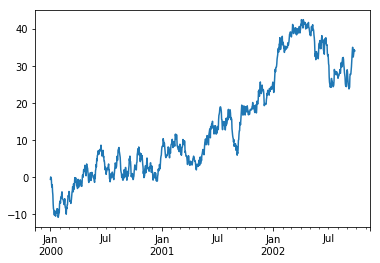

In [120]:
import matplotlib as plt

ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()

ts.plot()

其他参考链接 [ Getting the Best Performance out of NumPy](https://ipython-books.github.io/45-understanding-the-internals-of-numpy-to-avoid-unnecessary-array-copying/)